In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
import os
import pickle
from datetime import datetime
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import time
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error
import numpy as np

import warnings

# התעלמות מכל ההתראות
warnings.filterwarnings("ignore")


#pd.set_option('display.max_rows', None)


### קריאה קובץ לבדיקה פנימית

In [3]:
path ='/kaggle/input/panel-06/Panel_06.csv'
panel_06_df = pd.read_csv(path)
panel_06_df.isnull().sum()
#panel_06_df.info()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/panel-06/Panel_06.csv'

# יצירה של פייפליין



## פונקציה מס 1 בחירת משתנים

חלוקה לקטגוריות

In [ ]:
feature_categories = {
    "Gender": {
        "description": "Demographic data based on gender",
        "columns": [
            "Total_All", "MALE_All", "FEMALE_All", 
            "Male_0_4", "Male_5_9", "Male_10_14", "Male_15_19", "Male_20_24", 
            "Male_25_29", "Male_30_34", "Male_35_39", "Male_40_44", "Male_45_49", 
            "Male_50_54", "Male_55_59", "Male_60_64", "Male_65_69", "Male_70_74", 
            "Male_75_79", "Male_80_84", "Male_85+",
            "Female_0_4", "Female_5_9", "Female_10_14", "Female_15_19", "Female_20_24", 
            "Female_25_29", "Female_30_34", "Female_35_39", "Female_40_44", "Female_45_49", 
            "Female_50_54", "Female_55_59", "Female_60_64", "Female_65_69", "Female_70_74", 
            "Female_75_79", "Female_80_84", "Female_85+"
        ]
    },
    "Asthma": {
        "description": "Asthma-related data",
        "columns": [
             "AST002(percent)", "AST003(percent)", "AST004(percent)"
        ]
    },
    "COPD": {
        "description": "Chronic Obstructive Pulmonary Disease (COPD) related data",
        "columns": [
             "COPD002(percent)", "COPD003(percent)", 
            "COPD004(percent)", "COPD005(percent)", "COPD007(percent)"
        ]
    },
    "Income": {
        "description": "Economic data related to income",
        "columns": [
            "Weighted_Total_annual_income_(£)", "Weighted_Net_annual_income_(£)", 
            "Weighted_Net_annual_income_before_housing_costs_(£)", 
            "Weighted_Net_annual_income_after_housing_costs_(£)"
        ]
    },
    "Deprivation": {
        "description": "Data related to deprivation index",
        "columns": [
            "Weighted_Index_of_Multiple_Deprivation_(IMD)", "Weighted_Income", 
            "Weighted_Employment", "Weighted_Education,_Skills_and_Training", 
            "Weighted_Health_Deprivation_and_Disability", "Weighted_Crime", 
            "Weighted_Barriers_to_Housing_and_Services", "Weighted_Living_Environment"
        ]
    },
    "Parks_and_Housing": {
        "description": "Data related to parks and housing",
        "columns": [
            "Weighted_ParksOnly_Average_distance_to_nearest_Park_or_Public_Garden_(m)",
            "Weighted_ParksOnly_Average_size_of_nearest_Park_or_Public_Garden_(m2)",
            "Weighted_ParksOnly_Average_number_of_Parks_or_Public_Gardens_within_1,000_m_radius",
            "Weighted_ParksOnly_Number_of_built_up_area_postcodes__within_300m_of_a_Park_or_Public_Garden_(percentage)",
            "Weighted_ParksOnly_Number_of_built_up_area_postcodes__within_900m_of_a_Park_or_Public_Garden_(percentage)",
            "Weighted_ParksAndPlayingFields_Average_distance_to_nearest_Park_Public_Garden_or_Playing_Field_(m)",
            "Weighted_ParksAndPlayingFields_Average_size_of_nearest_Park_Public_Garden_or_Playing_Field_(m2)",
            "Weighted_ParksAndPlayingFields_Average_number_of__Parks_Public_Gardens_or_Playing_Fields_within_1,000_m_radius",
            "Weighted_ParksAndPlayingFields_Number_of_built_up_area_postcodes__within_300m_of_a_Park_Public_Garden_or_Playing_Field_(percentage)",
            "Weighted_ParksAndPlayingFields_Number_of_built_up_area_postcodes__within_900m_of_a_Park_Public_Garden_or_Playing_Field_(percentage)",
            "Weighted_Houses_Percentage_of_adresses_with_private_outdoor_space",
            "Weighted_Houses_Average_size_of_private_outdoor_space_(m2)",
            "Weighted_Houses_Median_size_of_private_outdoor_space_(m2)",
            "Weighted_Flats_Percentage_of_adresses_with_private_outdoor_space",
            "Weighted_Flats_Average_size_of_private_outdoor_space_(m2)",
            "Weighted_Flats_Average_number_of_flats_sharing_a_garden",
            "Weighted_Total_Percentage_of_adresses_with_private_outdoor_space"
        ]
    },
    "Obesity": {
        "description": "Obesity-related data",
        "columns": [
            "Obesity_Prevalence(per_cent)"
        ]
    },
    "Smoking": {
        "description": "Smoking-related data",
        "columns": [
            "SMOK002(percent)",
            "SMOK004(percent)",
            "SMOK005(percent)"
        ]
    }
}


In [ ]:
def SelectFeatures(df, feature_types, disease):
    Target = ""
    if disease == 'AST':
        Target = 'AST_Prevalence'
    elif disease == 'COPD':
        Target = 'COPD_Prevalence'
    else:
        print("Error: No matching case found for the disease provided.")
        return None
    
    print("Selected Categories :\n")
    selected_features = []
    

    for feature_type in feature_types:
        if feature_type in feature_categories:
            selected_features.extend(feature_categories[feature_type]["columns"])
            print(f"{feature_type}:")
            print(", ".join(feature_categories[feature_type]["columns"]))
            print(f"Description: {feature_categories[feature_type]['description']}\n")
        else:
            print(f"Error: Feature type '{feature_type}' not found!")

    selected_features_df = df[selected_features].copy()  # Make a copy of the selected features
    selected_features_df['YEAR'] = df['YEAR']
    selected_features_df[Target] = df[Target]
    
    # Remove rows where Target column has NaN values
    selected_features_df = selected_features_df.dropna(subset=[Target])

    return selected_features_df

## פונקציה מספר 2 - ניקוי חריגים

In [ ]:
####ישןןן

def OutliersRemoveOrReplace(df, method_outliers, threshold, action):
    """
    Clean outliers from a DataFrame.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    method_outliers (str): The method to use for outlier detection ('IQR' or 'StdDev').
    threshold (float): The threshold for determining outliers.
    action (str): The action to take on outliers ('remove' or 'replace'). 
    
    Returns:
    pd.DataFrame: The DataFrame with outliers handled.
    
    """
    
    if 'AST_Prevalence' in df.columns:
        Target = 'AST_Prevalence'
    elif 'COPD_Prevalence' in df.columns:
        Target = 'COPD_Prevalence'
        
    print(Target)
    # Select only numeric columns for outlier detection
    numeric_df = df.select_dtypes(include=[np.number])

    if method_outliers == 'IQR':
        Q1 = numeric_df.quantile(0.25)
        Q3 = numeric_df.quantile(0.75)
        IQR = Q3 - Q1
        filter_condition = ~((numeric_df < (Q1 - threshold * IQR)) | (numeric_df > (Q3 + threshold * IQR))).any(axis=1)
        outlier_condition = ((numeric_df < (Q1 - threshold * IQR)) | (numeric_df > (Q3 + threshold * IQR)))
    elif method_outliers == 'StdDev':
        mean = numeric_df.mean()
        std_dev = numeric_df.std()
        filter_condition = ~((numeric_df < (mean - threshold * std_dev)) | (numeric_df > (mean + threshold * std_dev))).any(axis=1)
        outlier_condition = ((numeric_df < (mean - threshold * std_dev)) | (numeric_df > (mean + threshold * std_dev)))
    else:
        raise ValueError("Invalid method. Choose 'IQR' or 'StdDev'.")

    if action == 'remove':
        # Filter the original dataframe to remove outliers
        df_clean = df[filter_condition]
        
        print("Clean outliers method:", method_outliers)
        print("Threshold:", threshold)
        print("Action: remove outliers")
        print(f"Number of outliers removed: {len(df) - len(df_clean)}")
        print(f"Number of rows in the cleaned dataset: {len(df_clean)}\n")
        
        return df_clean
    
    elif action == 'replace':
        # Replace outliers with NaN
        df_replaced = df.copy()
        df_replaced[outlier_condition] = np.nan


        
        print("Clean outliers method:", method_outliers)
        print("Threshold:", threshold)
        print("Action: replace outliers with NaN")
        print(f"Number of outliers replaced with NaN: {outlier_condition.sum().sum()}")
        

        return df_replaced
    
    else:
        raise ValueError("Invalid action. Choose 'remove' or 'replace'.")

## פונקציה מספר 3 - השלמת חסרים

In [ ]:
def Fill_missing_values(df, method_missing_values):
        
    # Count initial missing values
    initial_missing_count = df.isnull().sum().sum()
    
    if method_missing_values == 'mean':
        df_filled = df.fillna(df.mean())
    elif method_missing_values == 'median':
        df_filled = df.fillna(df.median())
    elif method_missing_values == 'drop_rows':
        df_filled = df.dropna()
    else:
        raise ValueError("Invalid method. Choose 'mean', 'median', or 'drop_rows'.")

    # Count remaining missing values
    remaining_missing_count = df_filled.isnull().sum().sum()

    # Calculate number of missing values handled
    num_filled = initial_missing_count - remaining_missing_count

    print("missing values method:", method_missing_values)
    print(f"Number of missing values handled: {num_filled}")
    print(f"Number of remaining missing values: {remaining_missing_count}")
    PercentageOfHandel = num_filled / df.size * 100
    if method_missing_values == 'drop_rows':
        print(f"Number of remaining rows: {df_filled.shape[0]}")
    print(f"Percentage of values handled: {PercentageOfHandel:.2f}%\n")

 

    return df_filled, num_filled, PercentageOfHandel

## פונקציה מספר 4 - ולידאציה של היפר פרמטים

In [ ]:
def safe_map(func, value_str):
    if value_str.strip('[]'):
        return list(map(func, value_str.strip('[]').split(',')))
    else:
        return []


## פונקציה מספר 5 - סינון שורות לפי שנים

In [ ]:
def FilterByYears(df, years):
    # בדיקת קיום עמודת השנה
    if 'YEAR' not in df.columns:
        print("Error: 'YEAR' column does not exist in DataFrame")
        return None
    
    # המרת years לרשימה אם זה לא רשימה כבר
    if not isinstance(years, list):
        years = [years]
    
    df['YEAR'] = df['YEAR'].astype(str).str.strip()
    df = df[df['YEAR'].str.isnumeric()]
    
    available_years = set(df['YEAR'].unique())
    missing_years = [year for year in years if year not in available_years]
    
    if missing_years:
        print(f"Warning: The following years are not available in the DataFrame: {missing_years}")
    
    # סינון ה-DataFrame לפי השנים שהתקבלו
    filtered_df = df[df['YEAR'].isin(years)].copy()
    filtered_df['YEAR'] = filtered_df['YEAR'].astype(int)
    print(f"Years selected for filtering: {years}")
    return filtered_df

## פונקציה מספר 6  - נרמול ערכים

In [ ]:
def Normalize_data(df, normalize_method):
    
    if normalize_method == 'Min-Max':
        scaler = MinMaxScaler()
        print("Normalization method: Min-Max\n")
    elif normalize_method == 'Quartile':
        print("Normalization method: Quartile\n")
        scaler = None
    else:
        print("Invalid normalization method. Choose 'Min-Max' or 'Quartile'.")
        return df
    
    # הפרדת העמודה האחרונה
    last_column = df.iloc[:, -1]
    columns_to_normalize = df.iloc[:, :-1]
    
    if normalize_method == 'Min-Max':
        # נרמול העמודות מלבד העמודה האחרונה
        normalized_data = pd.DataFrame(scaler.fit_transform(columns_to_normalize), columns=columns_to_normalize.columns)
    elif normalize_method == 'Quartile':
        # חישוב רבעונים
        Q1 = columns_to_normalize.quantile(0.25)
        Q3 = columns_to_normalize.quantile(0.75)
        IQR = Q3 - Q1
        normalized_data = (columns_to_normalize - Q1) / IQR
    
    # הוספת העמודה האחרונה חזרה ל-DataFrame
    normalized_data = pd.concat([normalized_data, last_column.reset_index(drop=True)], axis=1)
       
    return normalized_data

## XY פונקציה מספר 7 - פיצול סט מבחן וחלוקה ל

In [ ]:
def SplitDataAndPrepForModel(df, test_size=0.2 ):
    
    columns_to_drop = ['YEAR']
    
    df_after_drop = df.drop(columns=columns_to_drop)
    # Shuffle the DataFrame
    df_shuffled = shuffle(df_after_drop, random_state=42)

    X = df_shuffled.iloc[:, :-1] # הסרת העמודה האחרונה
    y = df_shuffled.iloc[:, -1]  # בחירת העמודה האחרונה  

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)


    return X_train, X_test, y_train, y_test

## פונקציה מספר 9 - יוצרת גריד פרמטרים

In [14]:
def get_param_grid(model_name, model_params):
    param_grid = {}
    
    if model_name == 'random_forest':
        param_grid = {key: model_params[key] for key in model_params.keys() & {'n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf'}}
    elif model_name == 'linear_regression':
        param_grid = {}
    elif model_name == 'xgboost':
        param_grid = {key: model_params[key] for key in model_params.keys() & {'n_estimators', 'max_depth', 'learning_rate', 'colsample_bytree', 'reg_lambda'}}
    else:
        raise ValueError(f"Unsupported model: {model_name}")
        
    print('The param grid for '+model_name+ ' model is:\n' )
    print(param_grid)


    return param_grid


## פונקציה 10 -  יוצרת פאנל, מפעילה את כל שאר הפונקציות

In [17]:
# מהופכת את הפאנל ,  להיות מוכן למודל

def Make_final_panel (panel_path,disease ,feature_types,method_outliers,threshold,Outliersaction,method_missing_values,normalize_method,years):
    
    OG_panel_df = pd.read_csv(panel_path)       
    after_FilterByYears_df = FilterByYears(OG_panel_df,years)
    after_selectFeatures_df = SelectFeatures(after_FilterByYears_df, feature_types, disease)
    after_CleanOutliers_df = OutliersRemoveOrReplace( after_selectFeatures_df , method_outliers, threshold,Outliersaction)
    after_missingValues_df,num_filled, remaining_missing_count = Fill_missing_values(after_CleanOutliers_df, method_missing_values)
    after_NormalizeData_df = Normalize_data(after_missingValues_df, normalize_method)
    
    return after_NormalizeData_df

    

 



# בדיקה ידנית   

אתחול 

In [23]:
##COPD

panel_path = '/kaggle/input/panel-06/Panel_06.csv'
ExprimentTracker_path ='/kaggle/input/exprimenttracker-hendcheck/__ExprimentTracker_hendCheck.xlsx'
panel_path = panel_path
file_path_of_params = ExprimentTracker_path

## הרצת המודל ללא ולידאציה

### COPD

In [27]:
# קריאת קובץ האקסל המכיל את פרמטרי הניסויים
ExprimentTracker_df = pd.read_excel(file_path_of_params, keep_default_na=False,skiprows = 8 )
# קריאת קובץ האקסל המכיל את פרמטרי הניסויים
COPD_ExprimentTracker_df = ExprimentTracker_df

# יצירת DataFrame ריק עם כותרות מתאימות
COPD_all_results = pd.DataFrame(columns=['ExperimentNumber'] + list(COPD_ExprimentTracker_df.columns))

# מעבר על כל שורה בקובץ האקסל של פרמטרי הניסויים
for COPD_index, COPD_row in COPD_ExprimentTracker_df.iterrows():
    
    # שליפת פרטי הניסוי הנוכחי
    COPD_experiment_number = int(COPD_row['ExperimentNumber'])
    COPD_years = COPD_row['Years'].split(', ')
    COPD_target = COPD_row['target']
    COPD_feature_types = COPD_row['feature_types'].split(', ')
    COPD_method_outliers = COPD_row['method_outliers']
    COPD_Outliersaction = COPD_row['Outliersaction']
    COPD_threshold = COPD_row['threshold']
    COPD_method_missing_values = COPD_row['method_missing_values']
    COPD_normalize_method = COPD_row['normalize_method']
    COPD_model_name = COPD_row['model_name']
    COPD_n_estimators = int(COPD_row['n_estimators'])
    COPD_max_depth = int(COPD_row['max_depth'])
    COPD_learning_rate = float(COPD_row['learning_rate'])
    COPD_min_samples_split = int(COPD_row['min_samples_split'])
    COPD_min_samples_leaf = int(COPD_row['min_samples_leaf'])
    COPD_colsample_bytree = float(COPD_row['colsample_bytree'])
    COPD_reg_lambda = float(COPD_row['reg_lambda'])
    COPD_cv = int(COPD_row['cv'])
    
    print('\n', 25*"#", " Experiment Number ", COPD_experiment_number, 25*"#")

    # יצירת הפאנל הסופי על פי הפרמטרים
    COPD_final_panel = Make_final_panel(panel_path, COPD_target, COPD_feature_types, COPD_method_outliers, COPD_threshold, COPD_Outliersaction, COPD_method_missing_values, COPD_normalize_method, COPD_years)

    # חלוקת הנתונים לערכות אימון ובדיקה
    COPD_X_train, COPD_X_test, COPD_y_train, COPD_y_test = SplitDataAndPrepForModel(COPD_final_panel, test_size=0.2)
    
    # הגדרת פרמטרי המודל
    COPD_model_params = {
        'n_estimators': COPD_n_estimators,
        'max_depth': COPD_max_depth,
        'learning_rate': COPD_learning_rate,
        'min_samples_split': COPD_min_samples_split,
        'min_samples_leaf': COPD_min_samples_leaf,
        'colsample_bytree': COPD_colsample_bytree,
        'reg_lambda': COPD_reg_lambda,
    }
    
    COPD_param_grid = get_param_grid(COPD_model_name, COPD_model_params)

    if COPD_model_name == 'random_forest':
        COPD_model = RandomForestRegressor()
    elif COPD_model_name == 'linear_regression':
        COPD_model = LinearRegression()
    elif COPD_model_name == 'xgboost':
        COPD_model = XGBRegressor()
    else:
        raise ValueError(f"Unsupported model: {COPD_model_name}")
    
    print("model_name:", COPD_model_name)
    
    # Train the model with the best parameters from param_grid
    COPD_best_model = COPD_model.set_params(**COPD_param_grid)
    COPD_best_model.fit(COPD_X_train, COPD_y_train)
    
    # Evaluate on training data
    COPD_y_train_pred = COPD_best_model.predict(COPD_X_train)
    COPD_r2_train = r2_score(COPD_y_train, COPD_y_train_pred)
    COPD_mse_train = mean_squared_error(COPD_y_train, COPD_y_train_pred)
    COPD_mae_train = mean_absolute_error(COPD_y_train, COPD_y_train_pred)
    COPD_rmse_train = np.sqrt(COPD_mse_train)
    COPD_std_train = np.std(COPD_y_train_pred)
    
    # Evaluate on test data
    COPD_y_test_pred = COPD_best_model.predict(COPD_X_test)
    COPD_r2_test = r2_score(COPD_y_test, COPD_y_test_pred)
    COPD_mse_test = mean_squared_error(COPD_y_test, COPD_y_test_pred)
    COPD_mae_test = mean_absolute_error(COPD_y_test, COPD_y_test_pred)
    COPD_rmse_test = np.sqrt(COPD_mse_test)
    COPD_std_test = np.std(COPD_y_test_pred)
    
    print("--- Training Performance ---")
    print("r2_score_train:", COPD_r2_train)
    print("mean_squared_error_train:", COPD_mse_train)
    print("mean_absolute_error_train:", COPD_mae_train)
    print("root_mean_squared_error_train:", COPD_rmse_train)
    print("std_train:", COPD_std_train)
    
    print("--- Test Performance ---")
    print("r2_score_test:", COPD_r2_test)
    print("mean_squared_error_test:", COPD_mse_test)
    print("mean_absolute_error_test:", COPD_mae_test)
    print("root_mean_squared_error_test:", COPD_rmse_test)
    print("std_test:", COPD_std_test)
    
    COPD_results = {
        'best_model': COPD_best_model,
        'r2_score_train': COPD_r2_train,
        'mse_train': COPD_mse_train,
        'mae_train': COPD_mae_train,
        'rmse_train': COPD_rmse_train,
        'std_train': COPD_std_train,
        'r2_score_test': COPD_r2_test,
        'mse_test': COPD_mse_test,
        'mae_test': COPD_mae_test,
        'rmse_test': COPD_rmse_test,
        'std_test': COPD_std_test
    }

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/exprimenttracker-hendcheck/__ExprimentTracker_hendCheck.xlsx'

### AST

In [15]:
## AST 

data_AST = {
    'ExperimentNumber': [3],
    'target': ['AST'],
    'Years': ['2013, 2014, 2015, 2016, 2017, 2018, 2019'],
    'feature_types': ['Gender, Income, Deprivation, Parks_and_Housing'],
    'method_outliers': ['IQR'],
    'Outliersaction': ['remove'],
    'threshold': [2.5],
    'method_missing_values': ['mean'],
    'normalize_method': ['Min-Max'],
    'model_name': ['xgboost'],
    'n_estimators': [100],
    'max_depth': [10],
    'min_samples_split': [1],
    'min_samples_leaf': [1],
    'colsample_bytree': [0.8],
    'reg_lambda': [0.01],
    'learning_rate': [0.1],
    'cv': [1]
}

df_AST = pd.DataFrame(data_AST)

# אם תרצה לראות את ה-DataFrame


In [16]:
# קריאת קובץ האקסל המכיל את פרמטרי הניסויים
AST_ExprimentTracker_df = df_AST

# יצירת DataFrame ריק עם כותרות מתאימות
AST_all_results = pd.DataFrame(columns=['ExperimentNumber'] + list(AST_ExprimentTracker_df.columns))

# מעבר על כל שורה בקובץ האקסל של פרמטרי הניסויים
for AST_index, AST_row in AST_ExprimentTracker_df.iterrows():
    
    # שליפת פרטי הניסוי הנוכחי
    AST_experiment_number = int(AST_row['ExperimentNumber'])
    AST_years = AST_row['Years'].split(', ')
    AST_target = AST_row['target']
    AST_feature_types = AST_row['feature_types'].split(', ')
    AST_method_outliers = AST_row['method_outliers']
    AST_Outliersaction = AST_row['Outliersaction']
    AST_threshold = AST_row['threshold']
    AST_method_missing_values = AST_row['method_missing_values']
    AST_normalize_method = AST_row['normalize_method']
    AST_model_name = AST_row['model_name']
    AST_n_estimators = int(AST_row['n_estimators'])
    AST_max_depth = int(AST_row['max_depth'])
    AST_learning_rate = float(AST_row['learning_rate'])
    AST_min_samples_split = int(AST_row['min_samples_split'])
    AST_min_samples_leaf = int(AST_row['min_samples_leaf'])
    AST_colsample_bytree = float(AST_row['colsample_bytree'])
    AST_reg_lambda = float(AST_row['reg_lambda'])
    AST_cv = int(AST_row['cv'])
    
    print('\n', 25*"#", " Experiment Number ", AST_experiment_number, 25*"#")

    # יצירת הפאנל הסופי על פי הפרמטרים
    AST_final_panel = Make_final_panel(panel_path, AST_target, AST_feature_types, AST_method_outliers, AST_threshold, AST_Outliersaction, AST_method_missing_values, AST_normalize_method, AST_years)

    # חלוקת הנתונים לערכות אימון ובדיקה
    AST_X_train, AST_X_test, AST_y_train, AST_y_test = SplitDataAndPrepForModel(AST_final_panel, test_size=0.2)
    
    # הגדרת פרמטרי המודל
    AST_model_params = {
        'n_estimators': AST_n_estimators,
        'max_depth': AST_max_depth,
        'learning_rate': AST_learning_rate,
        'min_samples_split': AST_min_samples_split,
        'min_samples_leaf': AST_min_samples_leaf,
        'colsample_bytree': AST_colsample_bytree,
        'reg_lambda': AST_reg_lambda,
    }
    
    AST_param_grid = get_param_grid(AST_model_name, AST_model_params)

    if AST_model_name == 'random_forest':
        AST_model = RandomForestRegressor()
    elif AST_model_name == 'linear_regression':
        AST_model = LinearRegression()
    elif AST_model_name == 'xgboost':
        AST_model = XGBRegressor()
    else:
        raise ValueError(f"Unsupported model: {AST_model_name}")
    
    print("model_name:", AST_model_name)
    
    # Train the model with the best parameters from param_grid
    AST_best_model = AST_model.set_params(**AST_param_grid)
    AST_best_model.fit(AST_X_train, AST_y_train)
    
    # Evaluate on training data
    AST_y_train_pred = AST_best_model.predict(AST_X_train)
    AST_r2_train = r2_score(AST_y_train, AST_y_train_pred)
    AST_mse_train = mean_squared_error(AST_y_train, AST_y_train_pred)
    AST_mae_train = mean_absolute_error(AST_y_train, AST_y_train_pred)
    AST_rmse_train = np.sqrt(AST_mse_train)
    AST_std_train = np.std(AST_y_train_pred)
    
    # Evaluate on test data
    AST_y_test_pred = AST_best_model.predict(AST_X_test)
    AST_r2_test = r2_score(AST_y_test, AST_y_test_pred)
    AST_mse_test = mean_squared_error(AST_y_test, AST_y_test_pred)
    AST_mae_test = mean_absolute_error(AST_y_test, AST_y_test_pred)
    AST_rmse_test = np.sqrt(AST_mse_test)
    AST_std_test = np.std(AST_y_test_pred)
    
    print("--- Training Performance ---")
    print("r2_score_train:", AST_r2_train)
    print("mean_squared_error_train:", AST_mse_train)
    print("mean_absolute_error_train:", AST_mae_train)
    print("root_mean_squared_error_train:", AST_rmse_train)
    print("std_train:", AST_std_train)
    
    print("--- Test Performance ---")
    print("r2_score_test:", AST_r2_test)
    print("mean_squared_error_test:", AST_mse_test)
    print("mean_absolute_error_test:", AST_mae_test)
    print("root_mean_squared_error_test:", AST_rmse_test)
    print("std_test:", AST_std_test)
    
    AST_results = {
        'best_model': AST_best_model,
        'r2_score_train': AST_r2_train,
        'mse_train': AST_mse_train,
        'mae_train': AST_mae_train,
        'rmse_train': AST_rmse_train,
        'std_train': AST_std_train,
        'r2_score_test': AST_r2_test,
        'mse_test': AST_mse_test,
        'mae_test': AST_mae_test,
        'rmse_test': AST_rmse_test,
        'std_test': AST_std_test
    }


 #########################  Experiment Number  3 #########################
Years selected for filtering: ['2013', '2014', '2015', '2016', '2017', '2018', '2019']
Selected Categories :

Gender:
Total_All, MALE_All, FEMALE_All, Male_0_4, Male_5_9, Male_10_14, Male_15_19, Male_20_24, Male_25_29, Male_30_34, Male_35_39, Male_40_44, Male_45_49, Male_50_54, Male_55_59, Male_60_64, Male_65_69, Male_70_74, Male_75_79, Male_80_84, Male_85+, Female_0_4, Female_5_9, Female_10_14, Female_15_19, Female_20_24, Female_25_29, Female_30_34, Female_35_39, Female_40_44, Female_45_49, Female_50_54, Female_55_59, Female_60_64, Female_65_69, Female_70_74, Female_75_79, Female_80_84, Female_85+
Description: Demographic data based on gender

Income:
Weighted_Total_annual_income_(£), Weighted_Net_annual_income_(£), Weighted_Net_annual_income_before_housing_costs_(£), Weighted_Net_annual_income_after_housing_costs_(£)
Description: Economic data related to income

Deprivation:
Weighted_Index_of_Multiple_Depriva

## הרצת המודל עם ולידאציה

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

def SplitDataAndPrepForModelWithVal(df, test_size=0.2, val_size=0.1):
    columns_to_drop = ['YEAR']
    
    df_after_drop = df.drop(columns=columns_to_drop)
    # Shuffle the DataFrame
    df_shuffled = shuffle(df_after_drop, random_state=42)

    X = df_shuffled.iloc[:, :-1] # הסרת העמודה האחרונה
    y = df_shuffled.iloc[:, -1]  # בחירת העמודה האחרונה  

    # First split to training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Split training set to training and validation sets
    val_relative_size = val_size / (1 - test_size)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_relative_size, random_state=42)

    return X_train, X_val, X_test, y_train, y_val, y_test




In [ ]:
# קריאת קובץ האקסל המכיל את פרמטרי הניסויים
ExprimentTracker_df = pd.read_excel(file_path_of_params, keep_default_na=False, skiprows=8)

# יצירת DataFrame ריק עם כותרות מתאימות
all_results = pd.DataFrame(columns=['ExperimentNumber'] + list(ExprimentTracker_df.columns))

# קריאת תוצאות קיימות אם הקובץ קיים
# if os.path.exists(results_filename):
#     all_results = pd.read_excel(results_filename)

# מעבר על כל שורה בקובץ האקסל של פרמטרי הניסויים
for index, row in ExprimentTracker_df.iterrows():
    # שליפת פרטי הניסוי הנוכחי
    experiment_number = int(row['ExperimentNumber'])  # מספר הניסוי
    years = row['Years'].split(', ')  # השנים הנכללות בניסוי
    target = row['target']  # מטרה
    feature_types = row['feature_types'].split(', ')  # סוגי מאפיינים
    method_outliers = row['method_outliers']  # שיטת טיפול בנקודות חריגות
    Outliersaction = row['Outliersaction']  # מחיקה של שורה או לשים ערך ריק
    threshold = row['threshold']  # סף
    method_missing_values = row['method_missing_values']  # שיטת טיפול בערכים חסרים
    normalize_method = row['normalize_method']  # שיטת נורמליזציה
    model_name = row['model_name']  # שם המודל
    n_estimators = int(row['n_estimators'])
    max_depth = int(row['max_depth'])
    learning_rate = float(row['learning_rate'])
    min_samples_split = int(row['min_samples_split'])
    min_samples_leaf = int(row['min_samples_leaf'])
    colsample_bytree = float(row['colsample_bytree'])
    reg_lambda = float(row['reg_lambda'])
    cv = int(row['cv'])  # קרוס ולידציה
    
    # הדפסת מידע על הניסוי הנוכחי
    print('\n', 25*"#", " Experiment Number ", experiment_number, 25*"#")

    # יצירת הפאנל הסופי על פי הפרמטרים
    final_panel = Make_final_panel(panel_path, target, feature_types, method_outliers, threshold, Outliersaction, method_missing_values, normalize_method, years)

    # חלוקת הנתונים לערכות אימון, ולידציה ומבחן
    X_train, X_val, X_test, y_train, y_val, y_test = SplitDataAndPrepForModelWithVal(final_panel, test_size=0.2, val_size=0.1)
    
    # הגדרת פרמטרי המודל
    model_params = {
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'learning_rate': learning_rate,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'colsample_bytree': colsample_bytree,
        'reg_lambda': reg_lambda,
    }
    
    param_grid = get_param_grid(model_name, model_params)

    if model_name == 'random_forest':
        model = RandomForestRegressor()
    elif model_name == 'linear_regression':
        model = LinearRegression()
    elif model_name == 'xgboost':
        model = XGBRegressor()
    else:
        raise ValueError(f"Unsupported model: {model_name}")
    
    print("model_name:", model_name)
    
    # Train the model with the best parameters from param_grid
    best_model = model.set_params(**param_grid)
    best_model.fit(X_train, y_train)
    
    # Evaluate on training data
    y_train_pred = best_model.predict(X_train)
    r2_train = r2_score(y_train, y_train_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    std_train = np.std(y_train_pred)
    
    # Evaluate on validation data
    y_val_pred = best_model.predict(X_val)
    r2_val = r2_score(y_val, y_val_pred)
    mse_val = mean_squared_error(y_val, y_val_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    rmse_val = np.sqrt(mse_val)
    std_val = np.std(y_val_pred)

    # Evaluate on test data
    y_test_pred = best_model.predict(X_test)
    r2_test = r2_score(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    std_test = np.std(y_test_pred)
    
    print("--- Training Performance ---")
    print("r2_score_train:", r2_train)
    print("mean_squared_error_train:", mse_train)
    print("mean_absolute_error_train:", mae_train)
    print("root_mean_squared_error_train:", rmse_train)
    print("std_train:", std_train)
    
    print("--- Validation Performance ---")
    print("r2_score_val:", r2_val)
    print("mean_squared_error_val:", mse_val)
    print("mean_absolute_error_val:", mae_val)
    print("root_mean_squared_error_val:", rmse_val)
    print("std_val:", std_val)

    print("--- Test Performance ---")
    print("r2_score_test:", r2_test)
    print("mean_squared_error_test:", mse_test)
    print("mean_absolute_error_test:", mae_test)
    print("root_mean_squared_error_test:", rmse_test)
    print("std_test:", std_test)
    
    results = {
        'best_model': best_model,
        'r2_score_train': r2_train,
        'mse_train': mse_train,
        'mae_train': mae_train,
        'rmse_train': rmse_train,
        'std_train': std_train,
        'r2_score_val': r2_val,
        'mse_val': mse_val,
        'mae_val': mae_val,
        'rmse_val': rmse_val,
        'std_val': std_val,
        'r2_score_test': r2_test,
        'mse_test': mse_test,
        'mae_test': mae_test,
        'rmse_test': rmse_test,
        'std_test': std_test
    }

### ניסוי להפחתה של אובר פיטינג

In [ ]:
start_time = time.time()      
model_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

if model_name == 'xgboost':
    model = XGBRegressor()
    grid_search = GridSearchCV(estimator=model, param_grid=model_params, scoring='r2', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    

    # Evaluate on training data
y_train_pred = best_model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
std_train = np.std(y_train_pred)

# Evaluate on validation data
y_val_pred = best_model.predict(X_val)
r2_val = r2_score(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)
std_val = np.std(y_val_pred)

# Evaluate on test data
y_test_pred = best_model.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
std_test = np.std(y_test_pred)

end_time = time.time()
total_time_seconds = end_time - start_time
total_time_minutes = total_time_seconds / 60  # Convert seconds to minutes

print("Run Time Minutes:", total_time_minutes)
print("--- Training Performance ---")
print("r2_score_train:", r2_train)
print("mean_squared_error_train:", mse_train)
print("mean_absolute_error_train:", mae_train)
print("root_mean_squared_error_train:", rmse_train)
print("std_train:", std_train)

print("--- Validation Performance ---")
print("r2_score_val:", r2_val)
print("mean_squared_error_val:", mse_val)
print("mean_absolute_error_val:", mae_val)
print("root_mean_squared_error_val:", rmse_val)
print("std_val:", std_val)

print("--- Test Performance ---")
print("r2_score_test:", r2_test)
print("mean_squared_error_test:", mse_test)
print("mean_absolute_error_test:", mae_test)
print("root_mean_squared_error_test:", rmse_test)
print("std_test:", std_test)

results = {
    'best_model': best_model,
    'r2_score_train': r2_train,
    'mse_train': mse_train,
    'mae_train': mae_train,
    'rmse_train': rmse_train,
    'std_train': std_train,
    'r2_score_val': r2_val,
    'mse_val': mse_val,
    'mae_val': mae_val,
    'rmse_val': rmse_val,
    'std_val': std_val,
    'r2_score_test': r2_test,
    'mse_test': mse_test,
    'mae_test': mae_test,
    'rmse_test': rmse_test,
    'std_test': std_test
}




In [ ]:
# Convert the dictionary to a DataFrame
results_df = pd.DataFrame([results])

# Save the DataFrame to a CSV file
results_df.to_csv('resultsOver.csv', index=False)

# ויזואליזציה של המודל 

### פיצירים מובילים באחוזים

<Figure size 1200x800 with 0 Axes>

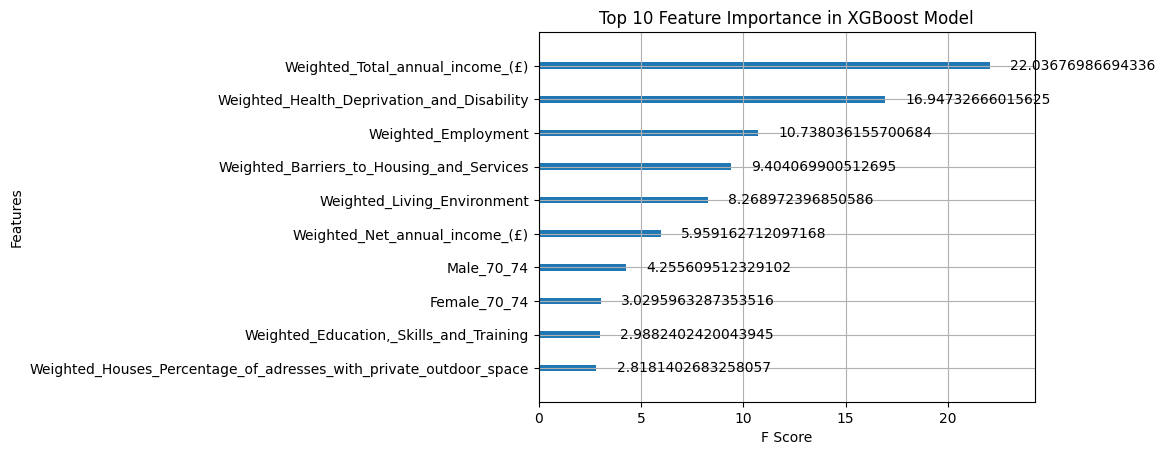


Top 10 features and their importance scores:
Weighted_Total_annual_income_(£): 22.0368
Weighted_Health_Deprivation_and_Disability: 16.9473
Weighted_Employment: 10.7380
Weighted_Barriers_to_Housing_and_Services: 9.4041
Weighted_Living_Environment: 8.2690
Weighted_Net_annual_income_(£): 5.9592
Male_70_74: 4.2556
Female_70_74: 3.0296
Weighted_Education,_Skills_and_Training: 2.9882
Weighted_Houses_Percentage_of_adresses_with_private_outdoor_space: 2.8181


In [30]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# יצירת תרשים
plt.figure(figsize=(12, 8))

# הצגת 10 התכונות החשובות ביותר
plot_importance(COPD_best_model, max_num_features=10, importance_type='gain')

# הוספת כותרת וכיוונון התצוגה
plt.title('Top 10 Feature Importance in XGBoost Model')
plt.xlabel('F Score')
plt.tight_layout()

# הצגת התרשים
plt.show()

# הדפסת ערכי החשיבות של 10 התכונות המובילות
feature_importance = COPD_best_model.get_booster().get_score(importance_type='gain')
sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)[:10]

print("\nTop 10 features and their importance scores:")
for feature, score in sorted_importance:
    print(f"{feature}: {score:.4f}")

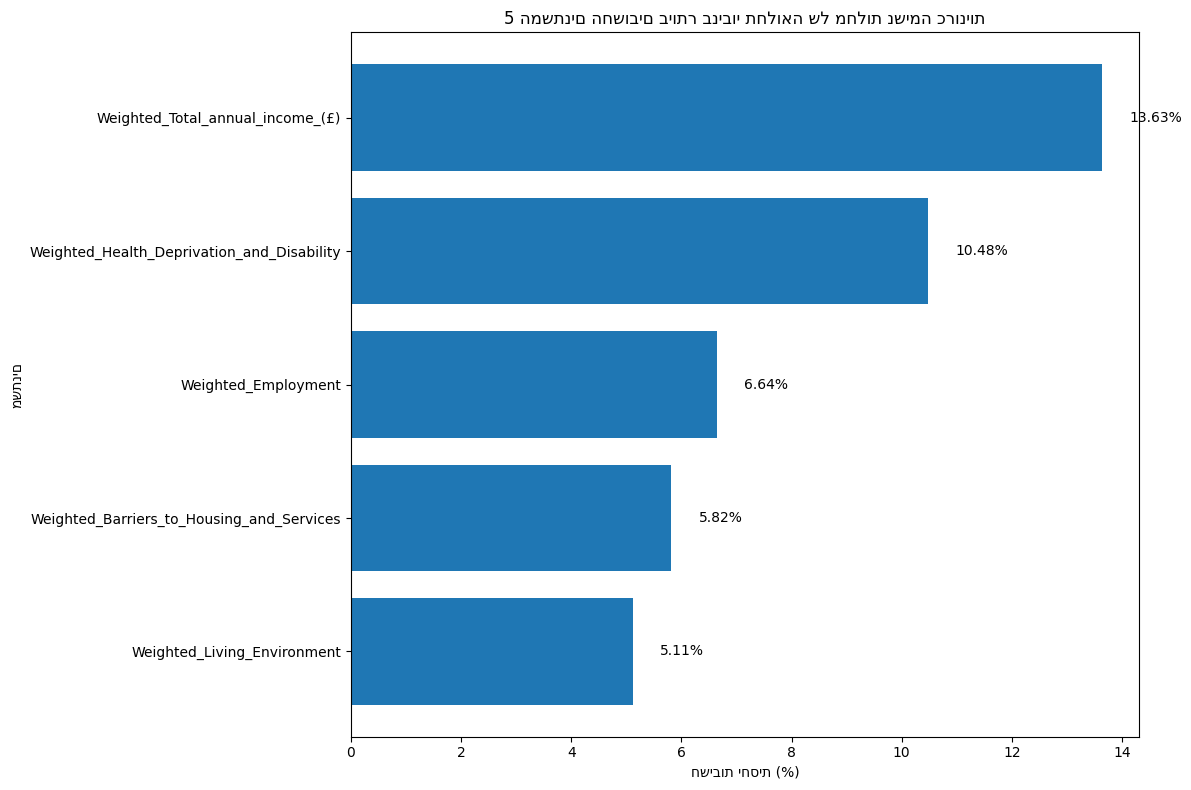


חמשת המשתנים החברתיים החשובים ביותר וערכי החשיבות שלהם באחוזים:
Weighted_Total_annual_income_(£): 13.63%
Weighted_Health_Deprivation_and_Disability: 10.48%
Weighted_Employment: 6.64%
Weighted_Barriers_to_Housing_and_Services: 5.82%
Weighted_Living_Environment: 5.11%


In [45]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
import pandas as pd

# קבלת חשיבות התכונות
feature_importance = COPD_best_model.get_booster().get_score(importance_type='gain')

# המרה לDataFrame ומיון
df = pd.DataFrame(list(feature_importance.items()), columns=['feature', 'importance'])
df = df.sort_values('importance', ascending=False)

# חישוב אחוזים
total_importance = df['importance'].sum()
df['importance_percent'] = df['importance'] / total_importance * 100

# בחירת 5 המובילים
top_5 = df.head(5)

# יצירת גרף
plt.figure(figsize=(12, 8))
plt.barh(top_5['feature'], top_5['importance_percent'])
plt.xlabel('חשיבות יחסית (%)')
plt.ylabel('משתנים')
plt.title('5 המשתנים החשובים ביותר בניבוי תחלואה של מחלות נשימה כרוניות')

# הוספת ערכים לכל עמודה
for i, v in enumerate(top_5['importance_percent']):
    plt.text(v + 0.5, i, f'{v:.2f}%', va='center')

plt.gca().invert_yaxis()  # להצגת המשתנה החשוב ביותר בראש
plt.tight_layout()
plt.show()

# הדפסת הערכים
print("\nחמשת המשתנים החברתיים החשובים ביותר וערכי החשיבות שלהם באחוזים:")
for index, row in top_5.iterrows():
    print(f"{row['feature']}: {row['importance_percent']:.2f}%")

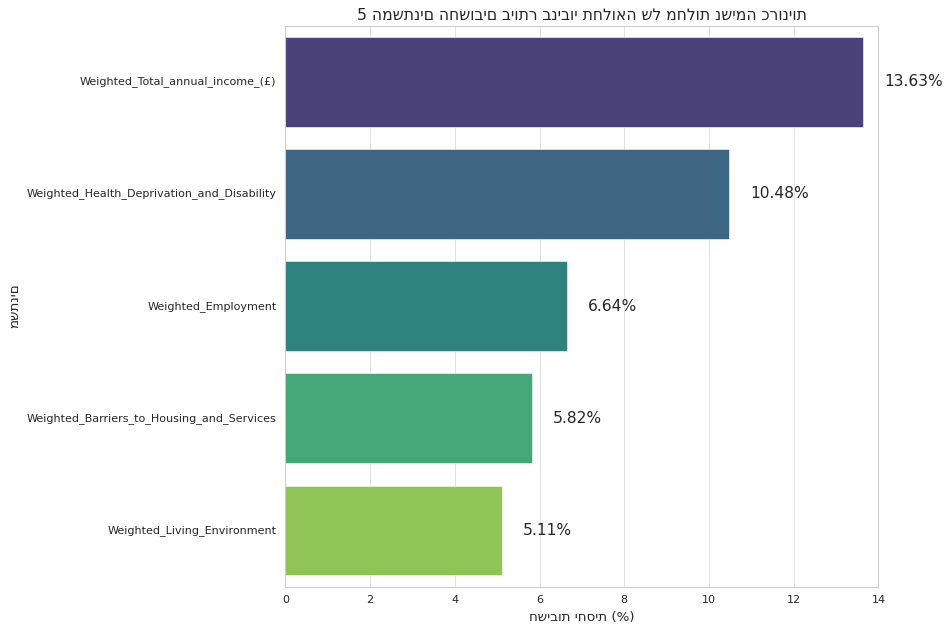

In [57]:
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='importance_percent', y='feature', data=top_5, palette='viridis')
plt.xlabel('חשיבות יחסית (%)')
plt.ylabel('משתנים')
plt.title('5 המשתנים החשובים ביותר בניבוי תחלואה של מחלות נשימה כרוניות', fontsize=14)
for i, v in enumerate(top_5['importance_percent']):
    ax.text(v + 0.5, i, f'{v:.2f}%', va='center', fontsize=14)
plt.tight_layout()
plt.show()

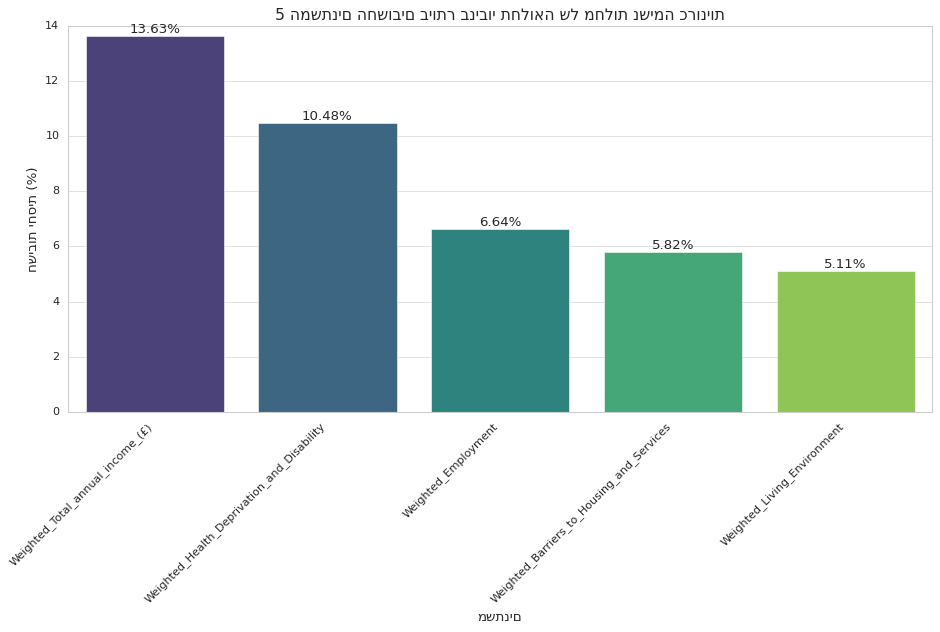

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# וודא שהטיפוסים נכונים
top_5['importance_percent'] = top_5['importance_percent'].astype(float)
top_5['feature'] = top_5['feature'].astype(str)

sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# יצירת גרף עמודות אנכי
ax = sns.barplot(x='feature', y='importance_percent', data=top_5, palette='viridis')

plt.xlabel('משתנים')
plt.ylabel('חשיבות יחסית (%)')
plt.title('5 המשתנים החשובים ביותר בניבוי תחלואה של מחלות נשימה כרוניות', fontsize=14)

# הוספת ערכים מעל כל עמודה
for i, v in enumerate(top_5['importance_percent']):
    ax.text(i, v, f'{v:.2f}%', ha='center', va='bottom', fontsize=12)

# סיבוב תוויות הציר X לשיפור הקריאות
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

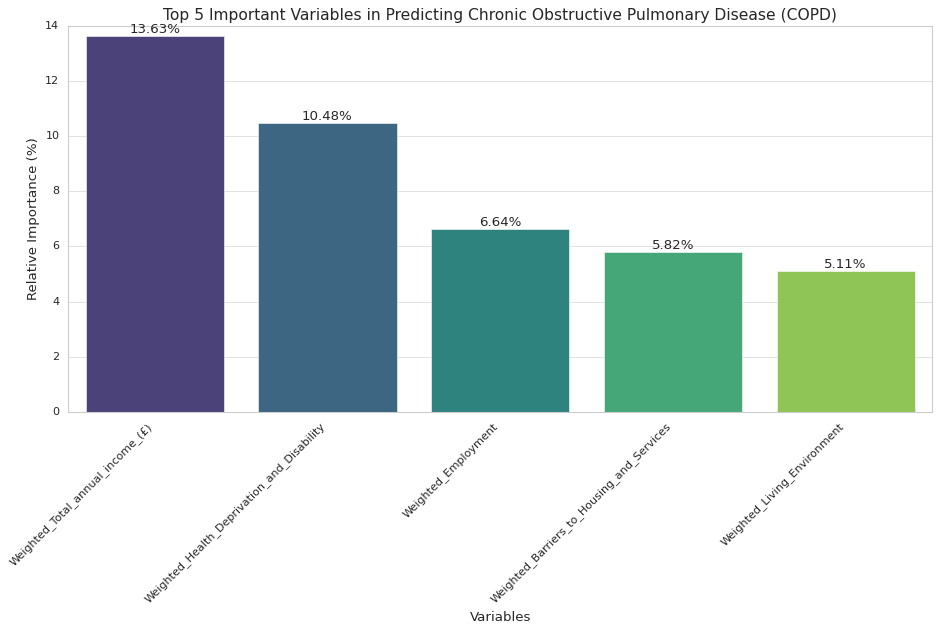

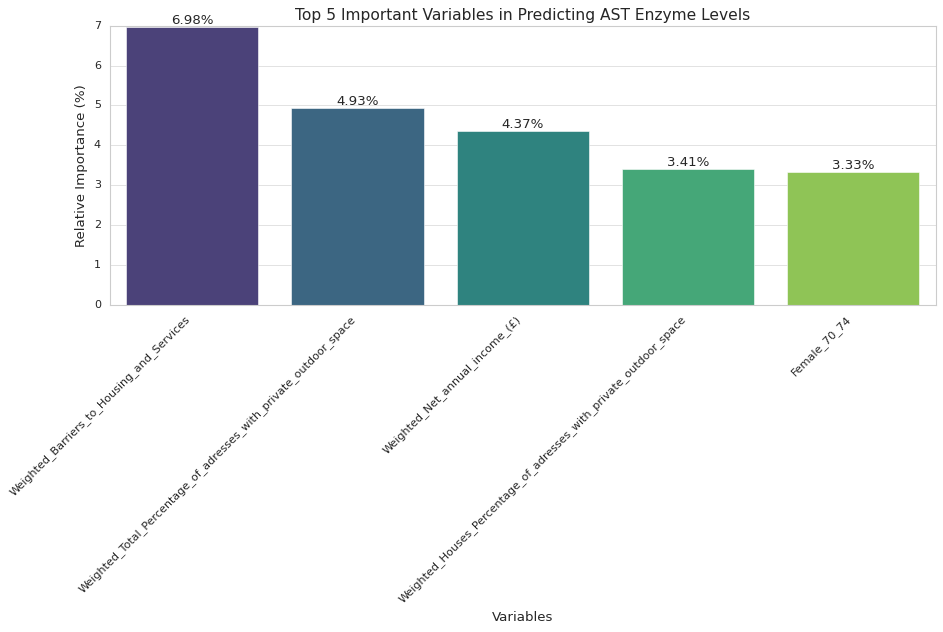

In [64]:
# שניהם יחד
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Function to create importance graph
def create_importance_graph(model, title):
    # Get feature importance
    feature_importance = model.get_booster().get_score(importance_type='gain')
    # Convert to DataFrame and sort
    df = pd.DataFrame(list(feature_importance.items()), columns=['feature', 'importance'])
    df = df.sort_values('importance', ascending=False)
    # Calculate percentages
    total_importance = df['importance'].sum()
    df['importance_percent'] = df['importance'] / total_importance * 100
    # Select top 5
    top_5 = df.head(5)

    # Create the graph
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x='feature', y='importance_percent', data=top_5, palette='viridis')
    plt.xlabel('Variables')
    plt.ylabel('Relative Importance (%)')
    plt.title(title, fontsize=14)
    
    # Add values above each bar
    for i, v in enumerate(top_5['importance_percent']):
        ax.text(i, v, f'{v:.2f}%', ha='center', va='bottom', fontsize=12)
    
    # Rotate X-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Create graph for COPD
create_importance_graph(COPD_best_model, 'Top 5 Important Variables in Predicting Chronic Obstructive Pulmonary Disease (COPD)')

# Create graph for AST
create_importance_graph(AST_best_model, 'Top 5 Important Variables in Predicting AST Enzyme Levels')

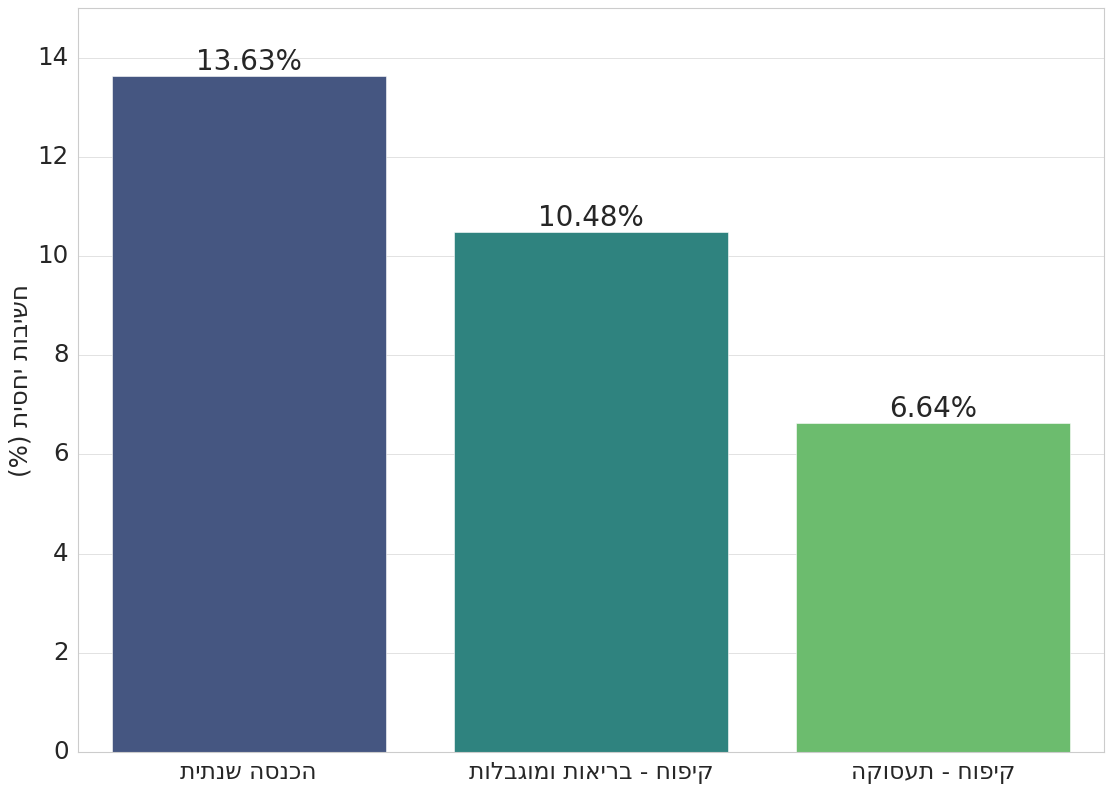

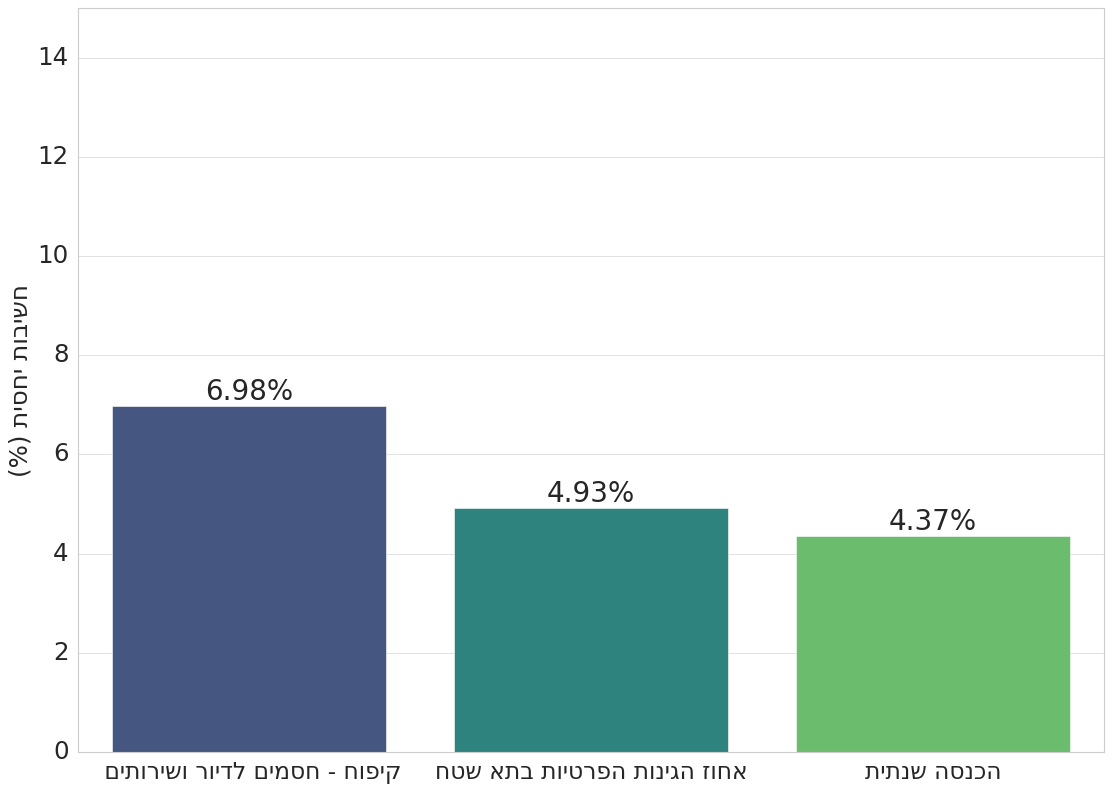

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from bidi.algorithm import get_display

# מילון התרגום (כפי שהוגדר קודם)
translation_dict = {
    "COPD": {
        "Weighted_Total_annual_income_(£)": "הכנסה שנתית",
        "Weighted_Health_Deprivation_and_Disability": "קיפוח - בריאות ומוגבלות",
        "Weighted_Employment": "קיפוח - תעסוקה",
        "Weighted_Barriers_to_Housing_and_Services": "קיפוח - חסמים לדיור ושירותים ",
        "Weighted_Living_Environment": "קיפוח - סביבת מגורים"
    },
    "AST": {
        "Weighted_Barriers_to_Housing_and_Services": "קיפוח - חסמים לדיור ושירותים ",
        "Weighted_Total_Percentage_of_adresses_with_private_outdoor_space": "אחוז הגינות הפרטיות בתא שטח",
        "Weighted_Net_annual_income_(£)": "הכנסה שנתית",
        "Weighted_Houses_Percentage_of_adresses_with_private_outdoor_space": "אחוז בתי המגורים משוקלל של כתובות עם מרחב חיצוני פרטי",
        "Female_70_74": "נשים בגילאים 70-74"
    }
}

def create_importance_graph(model, model_type):
    feature_importance = model.get_booster().get_score(importance_type='gain')
    df = pd.DataFrame(list(feature_importance.items()), columns=['feature', 'importance'])
    df = df.sort_values('importance', ascending=False)
    total_importance = df['importance'].sum()
    df['importance_percent'] = df['importance'] / total_importance * 100
    top_3 = df.head(3)
    
    top_3['feature'] = top_3['feature'].map(translation_dict[model_type])
    sns.set_style("whitegrid")
    plt.figure(figsize=(14, 10))
    ax = sns.barplot(x='feature', y='importance_percent', data=top_3, palette='viridis')
    plt.xlabel('')  # הסרת הכותרת של ציר ה-X
    plt.ylabel(get_display('חשיבות יחסית (%)'), fontsize=22)
   
    for i, v in enumerate(top_3['importance_percent']):
        ax.text(i, v, f'{v:.2f}%', ha='center', va='bottom', fontsize=25)
    
    plt.xticks(ha='center', fontsize=21)
    plt.yticks(fontsize=22)
    plt.ylim(0, 15)
    plt.tight_layout()
    
    ax.set_xticklabels([get_display(label.get_text()) for label in ax.get_xticklabels()])
    
    plt.show()

# יצירת גרף עבור COPD
create_importance_graph(COPD_best_model, 'COPD')
# יצירת גרף עבור AST
create_importance_graph(AST_best_model, 'AST')

### קורלציה עם מספרים מוכנים

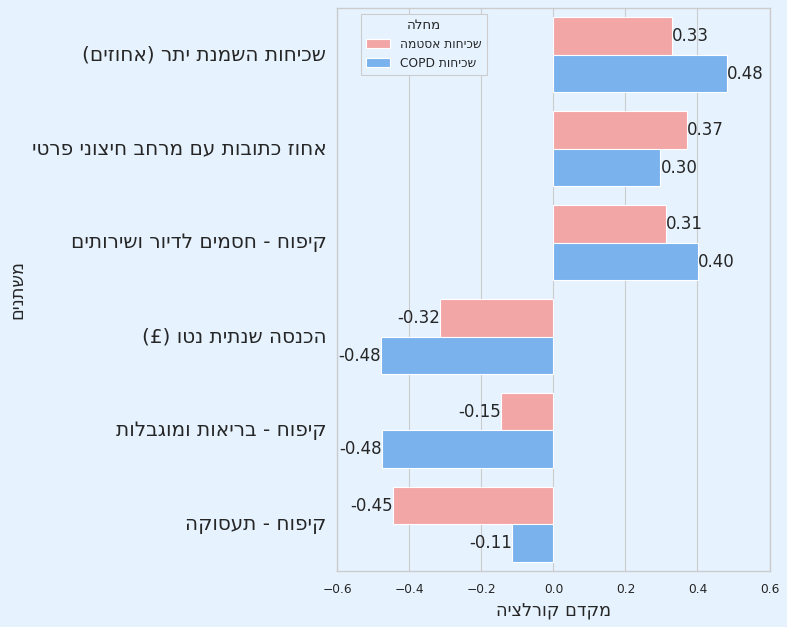

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bidi.algorithm import get_display

# יצירת הנתונים
data = {
    'משתנה': [
        'שכיחות השמנת יתר (אחוזים)',
        'אחוז כתובות עם מרחב חיצוני פרטי',
        'קיפוח - חסמים לדיור ושירותים',
        'הכנסה שנתית נטו (£)',
        'קיפוח - בריאות ומוגבלות',
        'קיפוח - תעסוקה'
    ],
    'שכיחות אסטמה': [0.328643, 0.370718, 0.311642, -0.315170, -0.146776, -0.445279],
    'שכיחות COPD': [0.482167, 0.297059, 0.401515, -0.479538, -0.475156, -0.114751]
}

# יצירת DataFrame
df = pd.DataFrame(data)

# יצירת תרשים עם רקע כחול בהיר
plt.figure(figsize=(10, 8), facecolor='#E6F3FF')
sns.set(style="whitegrid", rc={'axes.facecolor':'#E6F3FF'})

# יצירת תרשים עמודות אופקי
ax = sns.barplot(y='משתנה', x='value', hue='variable', 
                 data=pd.melt(df, ['משתנה']), 
                 palette=['#FF9999', '#66B2FF'],
                 orient='h')

# הוספת תמיכה בעברית לתוויות ציר y
ax.set_yticklabels([get_display(label.get_text()) for label in ax.get_yticklabels()])

# הגדלת גודל הגופן של תוויות ציר ה-Y
ax.tick_params(axis='y', labelsize=18)

# הוספת כותרות עם תמיכה בעברית
plt.ylabel(get_display('משתנים'), fontsize=16)
plt.xlabel(get_display('מקדם קורלציה'), fontsize=16)

# הוספת ערכים ליד העמודות עם גודל גופן 15
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', label_type='edge', fontsize=15)

# שינוי תוויות המקרא לעברית והעברתו לחלק העליון
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [get_display('שכיחות אסטמה'), get_display('שכיחות COPD')], 
          title=get_display('מחלה'), loc='upper center', bbox_to_anchor=(0.2, 1),
          ncol=1)

# התאמת המרווחים
plt.tight_layout()

# הצגת התרשים
plt.show()

# בדיקה

In [61]:
import shap


In [62]:
COPD_explainer = shap.TreeExplainer(COPD_best_model)
COPD_shap_values = COPD_explainer.shap_values(COPD_X_train)

explainer_AST = shap.TreeExplainer(AST_best_model)
shap_values_AST = explainer_AST.shap_values(AST_X_train)

In [ ]:
# יצירת גרף הסיכום עבור COPD
plt.figure(figsize=(12, 6))
shap.summary_plot(COPD_shap_values, COPD_X_train, plot_type="dot", max_display=7, show=False)
plt.title("Top 5 Important Features - COPD - SHAP Summary Plot")
plt.tight_layout()
plt.show()



In [ ]:
# יצירת גרף הסיכום עבור AST
plt.figure(figsize=(12, 6))
shap.summary_plot(shap_values_AST, AST_X_train, plot_type="dot", max_display=7, show=False)
plt.title("Top 5 Important Features - AST - SHAP Summary Plot")
plt.tight_layout()
plt.show()

###########

# הרצה על שניהם

In [33]:
def compute_shap_values(model, X_train):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_train)
    return shap_values

# קריאת נתונים, אימון המודל וחישוב ערכי SHAP עבור מחלת AST
AST_shap_values = compute_shap_values(AST_best_model, AST_X_train)
# קריאת נתונים, אימון המודל וחישוב ערכי SHAP עבור מחלת COPD
COPD_shap_values = compute_shap_values(COPD_best_model, COPD_X_train)

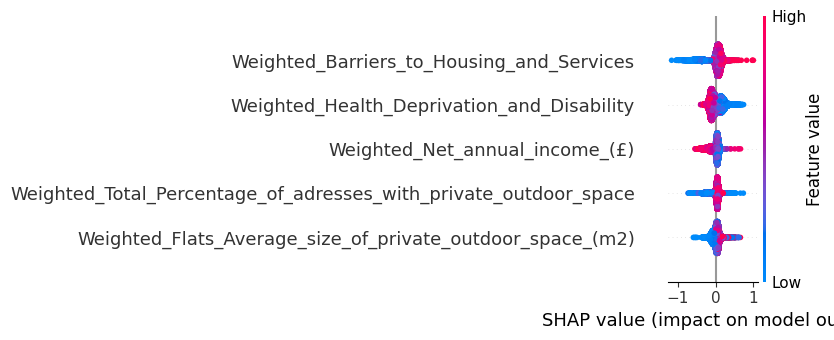

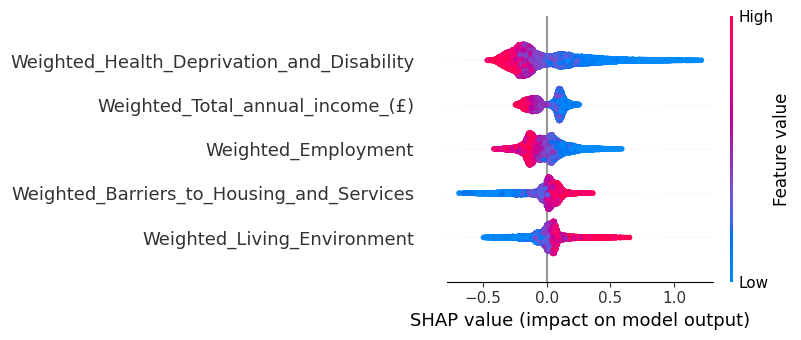

In [34]:
# גרף בנפרד

def plot_shap_values(shap_values, X_train, max_display=5, title="", subtitle=""):
    shap.summary_plot(shap_values, X_train, max_display=max_display, show=False)
    # Show the plot
    plt.show()


plot_shap_values(AST_shap_values, AST_X_train, title="השפעת המשתנים על תוצאות המודל", subtitle="SHAP Values - AST")
plot_shap_values(COPD_shap_values, COPD_X_train, title="השפעת המשתנים על תוצאות המודל", subtitle="SHAP Values - COPD")

# שניהם יחד

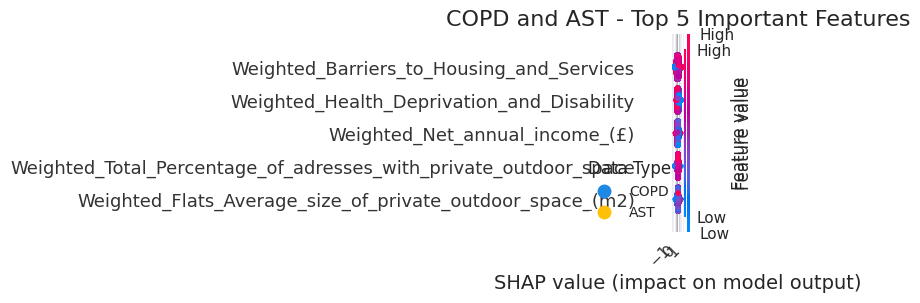

In [60]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# יצירת תרשים
plt.figure(figsize=(100, 80))
plt.rcParams.update({'font.size': 12})

# COPD plot
shap.summary_plot(COPD_shap_values, COPD_X_train, plot_type="dot", 
                  color="#1E88E5", max_display=5, show=False)

# AST plot
shap.summary_plot(AST_shap_values, AST_X_train, plot_type="dot", 
                  color="#FFC107", max_display=5, show=False)

# עיצוב הגרף
plt.title("COPD and AST - Top 5 Important Features", fontsize=16)
plt.xlabel("SHAP value (impact on model output)", fontsize=14)
plt.xticks(rotation=45, ha='right')

# הוספת מקרא
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='COPD',
                          markerfacecolor='#1E88E5', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='AST',
                          markerfacecolor='#FFC107', markersize=10)]
plt.legend(handles=legend_elements, loc='lower right', title='Data Type')

plt.tight_layout(pad=2.0)
plt.show()

### SHAP Values

### AST - SHAP Values

### COPD - SHAP Values

In [ ]:
"""## חיובי ושלילי

import shap
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import numpy as np

# Explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Convert feature names to Hebrew and reshape them for proper display
feature_names = X_test.columns
hebrew_feature_names = {
    "Weighted_Health_Deprivation_and_Disability": "קיפוח - בריאות ונכות",
    "Male_70_74": "גברים בגיל 70-74",
    "Weighted_Total_annual_income_(£)": "הכנסה שנתית כוללת",
    "Weighted_Education,_Skills_and_Training": "קיפוח - חינוך, כישורים והכשרה",
    "Weighted_Living_Environment": "קיפוח - סביבת מגורים",
    "Weighted_Barriers_to_Housing_and_Services": "קיפוח - מכשולים לדיור ושירותים מקומיים",
    "Weighted_Employment": "קיפוח - תעסוקה",
    "Weighted_Net_annual_income_(£)": "הכנסה שנתית נטו",
    "Female_85+": "נשים מעל גיל 85",
    "Male_30_34": "גברים בגיל 30-34"
}

hebrew_feature_names_display = [
    get_display(arabic_reshaper.reshape(hebrew_feature_names.get(name, name)))
    for name in feature_names
]

# Update feature names in X_test for display purposes
X_test_hebrew = X_test.copy()
X_test_hebrew.columns = hebrew_feature_names_display

# Set custom labels for the plot
custom_xticks = [get_display(arabic_reshaper.reshape("נמוך")), get_display(arabic_reshaper.reshape("גבוה"))]
custom_xlabel = get_display(arabic_reshaper.reshape("השפעה על המודל"))
custom_cbar_label = get_display(arabic_reshaper.reshape("גודל ההשפעה"))
custom_title_pos = get_display(arabic_reshaper.reshape("השפעה חיובית של המשתנים על תוצאות המודל"))
custom_title_neg = get_display(arabic_reshaper.reshape("השפעה שלילית של המשתנים על תוצאות המודל"))

# Print the structure of shap_values
print(f"Type of shap_values: {type(shap_values)}")
if isinstance(shap_values, list):
    print(f"Length of shap_values list: {len(shap_values)}")
    print(f"Shape of each element in shap_values list: {[val.shape for val in shap_values]}")
elif isinstance(shap_values, np.ndarray):
    print(f"Shape of shap_values: {shap_values.shape}")

def plot_shap_values(shap_values, X_test_hebrew, title, xlabel, cbar_label, xticks):
    plt.figure()
    shap.summary_plot(shap_values, X_test_hebrew, max_display=5, show=False)
    plt.title(title)
    plt.xlabel(xlabel)
    cbar = plt.gcf().axes[-1]
    cbar.set_yticklabels(xticks)
    cbar.set_ylabel(cbar_label)
    plt.show()

# Handle the case of multi-class or multi-output models
if isinstance(shap_values, list):
    for i, values in enumerate(shap_values):
        shap_values_pos = np.where(values > 0, values, 0)
        shap_values_neg = np.where(values < 0, values, 0)

        # Plot positive SHAP values
        plot_shap_values(shap_values_pos, X_test_hebrew, custom_title_pos, custom_xlabel, custom_cbar_label, custom_xticks)

        # Plot negative SHAP values
        plot_shap_values(shap_values_neg, X_test_hebrew, custom_title_neg, custom_xlabel, custom_cbar_label, custom_xticks)
else:
    shap_values_pos = np.where(shap_values > 0, shap_values, 0)
    shap_values_neg = np.where(shap_values < 0, shap_values, 0)

    # Plot positive SHAP values
    plot_shap_values(shap_values_pos, X_test_hebrew, custom_title_pos, custom_xlabel, custom_cbar_label, custom_xticks)

    # Plot negative SHAP values
    plot_shap_values(shap_values_neg, X_test_hebrew, custom_title_neg, custom_xlabel, custom_cbar_label, custom_xticks)
"""

# מה שנלקח

In [ ]:
import shap
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.pyplot as plt

# Explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(COPD_best_model)
shap_values = explainer.shap_values(COPD_X_test)

In [ ]:


# Convert feature names to Hebrew and reshape them for proper display
feature_names = COPD_X_test.columns
hebrew_feature_names = {
    "Weighted_Health_Deprivation_and_Disability": "קיפוח - בריאות ונכות",
    "Male_70_74": "גברים בגיל 70-74",
    "Weighted_Total_annual_income_(£)": "הכנסה שנתית כוללת",
    "Weighted_Education,_Skills_and_Training": "קיפוח - חינוך, כישורים והכשרה",
    "Weighted_Living_Environment": "קיפוח - סביבת מגורים",
    "Weighted_Barriers_to_Housing_and_Services": "קיפוח - מכשולים לדיור ושירותים מקומיים",
    "Weighted_Employment": "קיפוח - תעסוקה",
    "Weighted_Net_annual_income_(£)": "הכנסה שנתית נטו",
    "Female_85+": "נשים מעל גיל 85",
    "Male_30_34": "גברים בגיל 30-34"
}

hebrew_feature_names_display = [
    get_display(arabic_reshaper.reshape(hebrew_feature_names.get(name, name)))
    for name in feature_names
]

# Update feature names in X_test for display purposes
X_test_hebrew = COPD_X_test.copy()
X_test_hebrew.columns = hebrew_feature_names_display

In [ ]:
# Set custom labels for the plot
custom_xticks = [get_display(arabic_reshaper.reshape("נמוך")), get_display(arabic_reshaper.reshape("גבוה"))]
custom_xlabel = get_display(arabic_reshaper.reshape("השפעה על רמת התחלואה"))
custom_cbar_label = get_display(arabic_reshaper.reshape("גודל הערכים"))
custom_title = get_display(arabic_reshaper.reshape("השפעת המשתנים על תוצאות המודל"))
custom_subtitle = get_display(arabic_reshaper.reshape("SHAP Values - COPD"))

# Plot summary plot
plt.figure()
fig = plt.gcf()
fig.patch.set_facecolor('#e0ffff')  # Set the background color of the figure

ax = plt.gca()
ax.set_facecolor('#e0ffff')  # Set the background color of the axes

shap.summary_plot(shap_values, X_test_hebrew, max_display=5, show=False)
plt.title(custom_title, fontsize=14, x=0.15, y=1.08, ha='center')  # Centered title
plt.suptitle(custom_subtitle, fontsize=10, x=0.5, y=1.0, ha='center')  # Centered subtitle

plt.xlabel(custom_xlabel)
cbar = plt.gcf().axes[-1]
cbar.set_yticklabels(custom_xticks)
cbar.set_ylabel(custom_cbar_label)

# Show the plot
plt.show()

1. משמעות הצבעים:
   - סקאלת הצבעים נעה מכחול (נמוך) לאדום (גבוה).
   - כחול מייצג ערכים נמוכים של המאפיין.
   - אדום מייצג ערכים גבוהים של המאפיין.
   - סגול מייצג ערכים ממוצעים.

2. פיזור הנקודות:
   - כל נקודה מייצגת דוגמה מסוימת מהנתונים.
   - הציר האופקי מראה את ערך ה-SHAP (ההשפעה על תוצאת המודל).
   - ככל שהנקודה רחוקה יותר מהאפס, כך השפעתה גדולה יותר.

3. קריאת התרשים:
   - המאפיינים מסודרים מלמעלה למטה לפי מידת השפעתם הכוללת.
   - רוחב הפיזור האופקי מראה את טווח ההשפעה של המאפיין.
   - צפיפות הנקודות מראה את השכיחות של ערכי SHAP מסוימים.

4. פירוש התוצאות:
   - אם נקודות אדומות נוטות לצד ימין, זה אומר שערכים גבוהים של המאפיין מגדילים את תוצאת המודל.
   - אם נקודות כחולות נוטות לצד שמאל, זה אומר שערכים נמוכים של המאפיין מקטינים את תוצאת המודל.
   - פיזור סימטרי סביב האפס מרמז על השפעה מורכבת או פחות עקבית.

5. דוגמה מהתרשים:
   - עבור Weighted_Health_Deprivation_and_Disability, נקודות אדומות (ערכים גבוהים) נוטות חזק לימין, מה שמעיד על השפעה חיובית חזקה על תוצאת המודל כשיש יותר מחסור בריאותי.

כשמסתכלים על תמונה כזאת, חשוב להתמקד בסדר המאפיינים, בפיזור הנקודות, ובקשר בין הצבע (ערך המאפיין) למיקום על הציר האופקי (השפעה על המודל). זה מאפשר להבין איזה מאפיינים משפיעים ביותר ואיך הערכים השונים שלהם משפיעים על תוצאות המודל.



התרשים מציג תרשים סיכום SHAP (SHapley Additive exPlanations), המתאר את ההשפעה של מאפיינים שונים על תוצאות המודל. להלן ניתוח התוצאות:


1. המאפיינים המשפיעים ביותר:
   - Weighted_Health_Deprivation_and_Disability (מדד משוקלל של מחסור בריאותי ומוגבלות) בעל ההשפעה הגדולה ביותר, הן חיובית והן שלילית.
   - Male_70_74 (גברים בגילאי 70-74) הוא המאפיין השני בהשפעתו.

2. השפעות המאפיינים:
   - Weighted_Health_Deprivation_and_Disability: ערכים גבוהים מגדילים משמעותית את תוצאת המודל, בעוד ערכים נמוכים מקטינים אותה.
   - Male_70_74: יש לו השפעה מעורבת, כאשר גם ערכים גבוהים וגם נמוכים יכולים להגדיל או להקטין את התוצאה.
   - Weighted_Total_annual_income_(£) (הכנסה שנתית כוללת משוקללת): ערכים גבוהים יותר נוטים להקטין מעט את תוצאת המודל.
   - Weighted_Education_Skills_and_Training (מדד משוקלל של חינוך, כישורים והכשרה): מראה השפעה מגוונת, עם אפקטים חיוביים ושליליים.

3. מאפיינים פחות משפיעים:
   - Female_85+ (נשים מעל גיל 85) ו-Male_30_34 (גברים בגילאי 30-34) בעלי השפעה יחסית קטנה על תוצאת המודל.

4. סימטריה:
   - חלק מהמאפיינים כמו Weighted_Employment (תעסוקה משוקללת) ו-Weighted_Barriers_to_Housing_and_Services (חסמים משוקללים לדיור ושירותים) מראים השפעות די סימטריות עבור ערכים גבוהים ונמוכים.

5. טווח ההשפעות:
   - רוב ערכי ה-SHAP של המאפיינים נעים בין -1.0 ל-1.0, כאשר Weighted_Health_Deprivation_and_Disability חורג מטווח זה.

תרשים זה עוזר לזהות אילו מאפיינים הם החשובים ביותר לתחזיות המודל וכיצד הם משפיעים על התוצאה. הוא שימושי במיוחד להבנת חשיבות המאפיינים וההשפעה הכיוונית שלהם על החלטות המודל.



### PDP 

In [ ]:
final_panel.info()


In [ ]:
from sklearn.inspection import PartialDependenceDisplay

# PDP עבור המשתנה הראשון
PartialDependenceDisplay.from_estimator(model, X_train, [17])
plt.show()



1. ניתוח הגרף הנוכחי (PDP):
   - זהו גרף תלות חלקית (Partial Dependence Plot) עבור המשתנה Male_70_74.
   - הציר האופקי מייצג את ערכי המשתנה Male_70_74 (בין 0 ל-0.6).
   - הציר האנכי מייצג את התלות החלקית, כלומר ההשפעה הממוצעת על תוצאת המודל.
   - הקו מראה עלייה כללית, מה שמעיד על השפעה חיובית של המשתנה על התוצאה.

2. פרשנות:
   - ככל שאחוז הגברים בגילאי 70-74 עולה, כך עולה גם התוצאה הצפויה של המודל.
   - העלייה היא לא לינארית - יש עלייה חדה יותר בתחילה ואז התמתנות.

3. קישור לגרף ה-SHAP:
   - בגרף ה-SHAP, ראינו שMale_70_74 היה המשתנה השני בחשיבותו.
   - הגרף הנוכחי מאשר את ההשפעה החיובית שראינו ב-SHAP, אך מספק מידע נוסף על אופי ההשפעה.
   - ה-PDP מראה את ההשפעה הממוצעת, בעוד שה-SHAP הראה את ההשפעות הספציפיות לכל דוגמה.

4. המלצות להמשך:
   - כדאי לבדוק PDP גם עבור Weighted_Health_Deprivation_and_Disability, שהיה המשתנה המשפיע ביותר לפי ה-SHAP.
   - בדיקת PDP למשתנים נוספים שהראו השפעה משמעותית ב-SHAP יכולה לתת תמונה מלאה יותר.

5. יתרונות השילוב בין SHAP ו-PDP:
   - SHAP נותן תמונה כללית של חשיבות המשתנים וכיוון השפעתם.
   - PDP מספק מבט מעמיק יותר על אופי ההשפעה של משתנה ספציפי לאורך טווח הערכים שלו.

לסיכום, הגרף הזה מחזק את מה שראינו ב-SHAP לגבי ההשפעה החיובית של Male_70_74, ומוסיף מידע על אופי ההשפעה. זה מדגיש את החשיבות של אוכלוסיית הגברים המבוגרים במודל. לניתוח מקיף יותר, כדאי לבחון PDP גם עבור משתנים משפיעים אחרים שזיהינו בניתוח ה-SHAP.

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

# PDP עבור המשתנה הראשון
PartialDependenceDisplay.from_estimator(model, X_train, [0])
plt.show()


### learning_curve

In [ ]:
len(X_train)

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and std
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure()
plt.title("Learning Curves (XGBoost)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

# Plot training curve
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")

# Plot cross-validation curve
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()


In [ ]:
train_sizes

### residuals

In [ ]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_test_pred

# Plot residuals
plt.scatter(y_test_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(0, color='red', linestyle='--')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# יצירת נתונים סינתטיים
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1)

# חלוקת הנתונים לנתוני אימון ובדיקה
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# אימון המודל
model = RandomForestRegressor()
model.fit(X_train, y_train)

# תחזיות על נתוני הבדיקה
y_test_pred = model.predict(X_test)

# חישוב השאריות
residuals = y_test - y_test_pred

# Plot residuals
plt.scatter(y_test_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot - Good Model')
plt.axhline(0, color='red', linestyle='--')
plt.show()


In [ ]:
# יצירת נתונים סינתטיים
X, y = make_regression(n_samples=1000, n_features=10, noise=10)

# חלוקת הנתונים לנתוני אימון ובדיקה
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# אימון המודל
model = RandomForestRegressor()
model.fit(X_train, y_train)

# תחזיות על נתוני הבדיקה
y_test_pred = model.predict(X_test)

# חישוב השאריות
residuals = y_test - y_test_pred

# Plot residuals
plt.scatter(y_test_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot - Bad Model')
plt.axhline(0, color='red', linestyle='--')
plt.show()


### Feature Importance

In [ ]:
# קבלת חשיבות המשתנים לפי מספר קריטריונים
importance_weight = model.get_booster().get_score(importance_type='weight')
importance_gain = model.get_booster().get_score(importance_type='gain')
importance_cover = model.get_booster().get_score(importance_type='cover')

# יצירת DataFrame עבור כל קריטריון
importance_weight_df = pd.DataFrame({
    'feature': importance_weight.keys(),
    'importance': importance_weight.values()
}).sort_values(by='importance', ascending=False).head(10)

importance_gain_df = pd.DataFrame({
    'feature': importance_gain.keys(),
    'importance': importance_gain.values()
}).sort_values(by='importance', ascending=False).head(10)

importance_cover_df = pd.DataFrame({
    'feature': importance_cover.keys(),
    'importance': importance_cover.values()
}).sort_values(by='importance', ascending=False).head(10)

# גרפים עבור כל קריטריון
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
sns.barplot(x='importance', y='feature', data=importance_weight_df)
plt.title('Top 10 Important Features by Weight')

plt.subplot(3, 1, 2)
sns.barplot(x='importance', y='feature', data=importance_gain_df)
plt.title('Top 10 Important Features by Gain')

plt.subplot(3, 1, 3)
sns.barplot(x='importance', y='feature', data=importance_cover_df)
plt.title('Top 10 Important Features by Cover')

plt.tight_layout()
plt.show()


הקוד מציג את חשיבות המשתנים במודל שלך לפי שלושה קריטריונים שונים:

Weight: מספר הפעמים שהמשתנה נבחר לפצל עצים.
Gain: השיפור במידע (או ברווח) שהמשתנה הביא לכל פיצול.
Cover: סך כל התצפיות שהמשתנה כיסה בפיצוליו.
מה אני אמור לראות:
שלושת הגרפים מציגים את 10 המשתנים הכי חשובים לפי כל קריטריון.
מסקנות:
אילו משתנים הם הכי חשובים למודל לפי כל קריטריון.
האם יש משתנים שחוזרים על עצמם כחשובים בכל הקריטריונים.
מה החשיבות היחסית של כל משתנה במודל.

### Predicted vs. True Values

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_scatter(predictions, true_values):
    plt.figure(figsize=(8, 6))
    plt.scatter(predictions, true_values, color='blue', alpha=0.5)
    plt.title('Scatter Plot of Predicted vs. True Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('True Values')
    plt.grid(True)
    plt.show()



plot_scatter(y_test_pred, y_test)


### correlations

In [ ]:
import pandas as pd

# נניח שהמשתנה האחרון הוא משתנה המטרה
target_variable = final_panel.columns[-1]

# חישוב קורלציה בין משתנה המטרה לכל שאר המשתנים
correlations = final_panel.corr()[target_variable].drop(target_variable)

# מיון הקורלציות לפי הערך עצמו (לא ערך מוחלט)
sorted_correlations = correlations.sort_values(ascending=False)

print(f"קורלציות עם משתנה המטרה '{target_variable}':")
print("\n10 הקורלציות הגבוהות ביותר (כולל חיוביות):")
print(sorted_correlations.head(10))

print("\n10 הקורלציות הנמוכות ביותר (כולל שליליות):")
print(sorted_correlations.tail(10))

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# נניח שהמשתנה האחרון הוא משתנה המטרה
target_variable = final_panel.columns[-1]

# חישוב קורלציה בין משתנה המטרה לכל שאר המשתנים
correlations = final_panel.corr()[target_variable].drop(target_variable)

# מיון הקורלציות לפי הערך עצמו (לא ערך מוחלט)
sorted_correlations = correlations.sort_values(ascending=False)

# יצירת DataFrame עבור הקורלציות הגבוהות והנמוכות
high_corr = sorted_correlations.head(5)
low_corr = sorted_correlations.tail(5)

# איחוד הנתונים
corr_data = pd.concat([high_corr, low_corr])

# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_data.values, y=corr_data.index)
plt.title(get_display(arabic_reshaper.reshape(f"קורלציות עם משתנה המטרה '{target_variable}'")))
plt.xlabel(get_display(arabic_reshaper.reshape("ערך קורלציה")))
plt.ylabel(get_display(arabic_reshaper.reshape("משתנים")))
plt.show()
